In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [19]:

# Initialize the reader
reader = easyocr.Reader(['en'], gpu=False)  # Set gpu=True if you have a compatible GPU

# Load the image
image_path = 'CAPTURE.png'
img = cv2.imread(image_path)


Using CPU. Note: This module is much faster with a GPU.


In [20]:

# Extract text
result = reader.readtext(image_path, detail=1)  # detail=1 to get bounding box info
print([i[1] for i in result])

['Nutrients', 'Per', 'Per Serve', '%RDA', 'Energy', '445 Kcal', '8.9 %', 'Total Fat', '16.4 g', '9.8 %', 'Saturated Fat', '2.8 g', '5.1 %', 'Trans Fat', '0.0', '0.0 %', 'Polyunsaturated Fat', '8 g', 'Monounsaturated Fat', '5 g', 'Cholesterol', '0.0 mg', 'Total Carbohydrates', '52.2 g', '16%', 'Total Sugar', '6.0 g', 'Added Sugar', '0.0 g', '0 %', 'Dietary Fibre', '11.3 g', '11.3', 'Protein', '22 g', '16.4 %', 'Calcuim', '61.4 mg', '2.5 %', 'Iron', '6.5 mg', '10 %', 'Potassium', '559.2 m', '6.6 %', 'Sodium', '10.5 mg', '0.2 %', '100g']


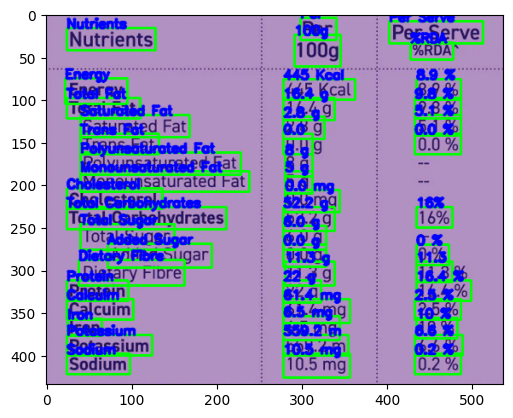

In [21]:

# Display the image with detected text boxes
for (bbox, text, prob) in result:
    # Draw bounding box
    top_left = tuple(map(int, bbox[0]))  # Convert to integer
    bottom_right = tuple(map(int, bbox[2]))  # Convert to integer
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    
    # Put detected text on image
    img = cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [22]:

# Print extracted text
for res in result:
    print(res)


([[24, 16], [128, 16], [128, 42], [24, 42]], 'Nutrients', 0.9533307453604812)
([[298, 4], [340, 4], [340, 30], [298, 30]], 'Per', 0.9999801782778809)
([[402, 8], [512, 8], [512, 34], [402, 34]], 'Per Serve', 0.9999843040486183)
([[427, 33], [477, 33], [477, 53], [427, 53]], '%RDA', 0.969813346862793)
([[22, 75], [95, 75], [95, 105], [22, 105]], 'Energy', 0.9998700085743643)
([[278, 76], [362, 76], [362, 100], [278, 100]], '445 Kcal', 0.7629812201714413)
([[434, 76], [486, 76], [486, 100], [434, 100]], '8.9 %', 0.8226176216878132)
([[24, 98], [110, 98], [110, 122], [24, 122]], 'Total Fat', 0.9997743669419358)
([[278, 98], [338, 98], [338, 124], [278, 124]], '16.4 g', 0.5686248265023577)
([[432, 98], [486, 98], [486, 122], [432, 122]], '9.8 %', 0.559411358857143)
([[40, 118], [168, 118], [168, 144], [40, 144]], 'Saturated Fat', 0.9996439727735994)
([[278, 120], [326, 120], [326, 146], [278, 146]], '2.8 g', 0.6933165636529818)
([[432, 118], [486, 118], [486, 142], [432, 142]], '5.1 %', 0.

In [23]:
for (bbox, text, prob) in result:
    print(bbox, '::',text, '::', prob)
    print()

[[24, 16], [128, 16], [128, 42], [24, 42]] :: Nutrients :: 0.9533307453604812

[[298, 4], [340, 4], [340, 30], [298, 30]] :: Per :: 0.9999801782778809

[[402, 8], [512, 8], [512, 34], [402, 34]] :: Per Serve :: 0.9999843040486183

[[427, 33], [477, 33], [477, 53], [427, 53]] :: %RDA :: 0.969813346862793

[[22, 75], [95, 75], [95, 105], [22, 105]] :: Energy :: 0.9998700085743643

[[278, 76], [362, 76], [362, 100], [278, 100]] :: 445 Kcal :: 0.7629812201714413

[[434, 76], [486, 76], [486, 100], [434, 100]] :: 8.9 % :: 0.8226176216878132

[[24, 98], [110, 98], [110, 122], [24, 122]] :: Total Fat :: 0.9997743669419358

[[278, 98], [338, 98], [338, 124], [278, 124]] :: 16.4 g :: 0.5686248265023577

[[432, 98], [486, 98], [486, 122], [432, 122]] :: 9.8 % :: 0.559411358857143

[[40, 118], [168, 118], [168, 144], [40, 144]] :: Saturated Fat :: 0.9996439727735994

[[278, 120], [326, 120], [326, 146], [278, 146]] :: 2.8 g :: 0.6933165636529818

[[432, 118], [486, 118], [486, 142], [432, 142]] :

In [8]:
import pandas as pd

# Initialize empty table
table_data = []

for (bbox, text, prob) in result:
    # Extract the bounding box coordinates
    top_left, top_right, bottom_right, bottom_left = bbox
    # Calculate average y-coordinate for row position (you can also use x-coordinate for columns)
    avg_y = (top_left[1] + bottom_left[1]) / 2

    # Append text and its corresponding position
    table_data.append((avg_y, text))

# Sort based on row position (avg_y) to maintain order of rows
table_data.sort(key=lambda x: x[0])

# Convert to a DataFrame or list-based table structure
table = pd.DataFrame(table_data, columns=['Position', 'Text'])
print(table)


    Position                                               Text
0       88.0           NUTRITIONAL INFORMATION (Approx: values)
1      114.5  No: of Servings per pack: 25 (Approx) Serving ...
2      159.0                                                Per
3      163.0                                          Per Serve
4      173.0                                          Nutrients
..       ...                                                ...
60     848.0                                   Proprietary Food
61     849.0                 Breakfast Cereals including Rolled
62     870.0                                               Oats
63     913.5                   Contains Oats, Peanuts & Almonds
64     915.5                               Allergen Information

[65 rows x 2 columns]


In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
table

,Position,Text
0,88.000000,NUTRITIONAL INFORMATION (Approx: values)
1,114.500000,No: of Servings per pack: 25 (Approx) Serving ...
2,159.000000,Per
3,163.000000,Per Serve
4,173.000000,Nutrients
5,185.000000,%RDA-
6,188.000000,100g
7,230.411699,Energy
8,233.000000,445 Kcal
9,233.000000,8.9 %


## retrying configuring

In [24]:
table_data = []

# Iterate through the result and capture the bounding box and text
for (bbox, text, prob) in result:
    # bbox is the bounding box around the detected text
    top_left, top_right, bottom_right, bottom_left = bbox
    
    # Average the y-coordinates to determine the row position
    avg_y = (top_left[1] + bottom_left[1]) / 2
    # Average the x-coordinates to determine the column position (for rough column detection)
    avg_x = (top_left[0] + top_right[0]) / 2
    
    # Append the text along with its average row and column positions
    table_data.append({
        'text': text,
        'avg_x': avg_x,
        'avg_y': avg_y
    })

# Sort the data based on y (rows) and then x (columns) to maintain table structure
table_data.sort(key=lambda x: (x['avg_y'], x['avg_x']))

# Now, group the text into rows and columns
# We will assume that a big change in the y-coordinate (between rows) indicates a new row

# Define a threshold to differentiate between rows (i.e., a large y-coordinate difference)
row_threshold = 10  # Adjust this value based on your image

# Initialize variables for rows and columns
rows = []
current_row = []
last_y = table_data[0]['avg_y']

# Iterate over the sorted table_data and group them by rows
for entry in table_data:
    y_diff = abs(entry['avg_y'] - last_y)
    
    if y_diff > row_threshold:  # New row if difference in y is too big
        rows.append(current_row)  # Add the previous row to rows
        current_row = []  # Start a new row
    current_row.append(entry['text'])
    last_y = entry['avg_y']

# Add the last row
rows.append(current_row)

# Now we can create a DataFrame from the rows
# The first row will be the header if the first row contains column names

# Assuming the first row is the header, otherwise skip this step
df = pd.DataFrame(rows[1:], columns=rows[0])

print(df)

                    Per            Per Serve Nutrients
0                  100g                 %RDA      None
1              445 Kcal                8.9 %    Energy
2             Total Fat                9.8 %    16.4 g
3                 5.1 %        Saturated Fat     2.8 g
4             Trans Fat                  0.0     0.0 %
5   Polyunsaturated Fat                  8 g      None
6   Monounsaturated Fat                  5 g      None
7           Cholesterol               0.0 mg      None
8                   16%  Total Carbohydrates    52.2 g
9           Total Sugar                6.0 g      None
10                  0 %          Added Sugar     0.0 g
11                 11.3        Dietary Fibre    11.3 g
12              Protein               16.4 %      22 g
13              Calcuim                2.5 %   61.4 mg
14                 Iron               6.5 mg      10 %
15            Potassium              559.2 m     6.6 %
16               Sodium                0.2 %   10.5 mg


In [25]:
df

,Per,Per Serve,Nutrients
0,100g,%RDA,None
1,445 Kcal,8.9 %,Energy
2,Total Fat,9.8 %,16.4 g
3,5.1 %,Saturated Fat,2.8 g
4,Trans Fat,0.0,0.0 %
5,Polyunsaturated Fat,8 g,None
6,Monounsaturated Fat,5 g,None
7,Cholesterol,0.0 mg,None
8,16%,Total Carbohydrates,52.2 g
9,Total Sugar,6.0 g,None


In [12]:


for y, text, bbox in table_data:
    # If the new text block is within the same row (adjust for some vertical margin)
    if abs(y - current_y) < 15:  # Tweak the margin depending on the image
        current_row.append((bbox[0][0], text))  # Use x-coordinate for sorting columns
    else:
        # Sort the current row by x-coordinate (left to right) to order columns
        current_row.sort(key=lambda x: x[0])
        rows.append([t[1] for t in current_row])  # Store the row text
        
        # Reset for the next row
        current_row = [(bbox[0][0], text)]
        current_y = y

# Add the last processed row
if current_row:
    current_row.sort(key=lambda x: x[0])
    rows.append([t[1] for t in current_row])

# Convert the result into a Pandas DataFrame
df = pd.DataFrame(rows)

# Display or save the table as needed
print(df)

ValueError: not enough values to unpack (expected 3, got 2)